<a href="https://colab.research.google.com/github/rlevy820/scotus-research/blob/main/scotusEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Collect Data

In [13]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/rlevy820/scotus-research/refs/heads/main/data/Case%20Centered%20Data.csv', encoding='latin-1')

### Cleaning Data
- Remove columns not in columns_to_keep
- Drop N/A
- Keep cases from terms before earliest_term
- Drop "other" from partyWinning

In [14]:
columns_to_keep = ['term', 'caseOrigin', 'issueArea', 'petitioner', 'respondent', 'lcDispositionDirection', 'declarationUncon', 'partyWinning']
earliest_term = 1946
response = 'partyWinning'

df_dropna = df_raw[columns_to_keep].dropna()

df_dropna['term'] = pd.to_numeric(df_dropna['term'], errors='coerce')
df_term_cap = df_dropna[df_dropna['term'] >= earliest_term]
df_drop_win_party_2 = df_term_cap[df_term_cap[response] != 2]

df = df_drop_win_party_2

df.head()

# export as csv
# df.to_csv('scotus-09-19-24.csv', index=False)

,term,caseOrigin,issueArea,petitioner,respondent,lcDispositionDirection,declarationUncon,partyWinning
0,1946,51.0,8.0,198.0,172.0,1.0,1.0,1.0
1,1946,123.0,1.0,100.0,27.0,1.0,1.0,0.0
2,1946,123.0,1.0,100.0,27.0,1.0,1.0,0.0
3,1946,123.0,1.0,100.0,27.0,1.0,1.0,0.0
4,1946,123.0,1.0,100.0,27.0,1.0,1.0,0.0


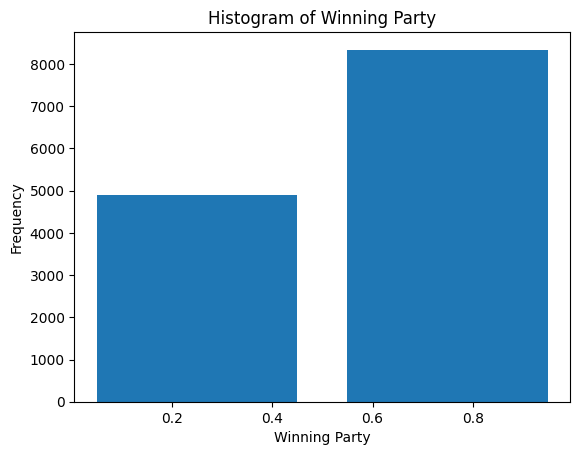

              Count  Percentage
partyWinning                   
1.0            8339   62.950102
0.0            4908   37.049898


In [15]:
plt.hist(df['partyWinning'], bins=2, rwidth=0.8)
plt.xlabel('Winning Party')
plt.ylabel('Frequency')
plt.title('Histogram of Winning Party')
plt.show()

party_winning_counts = df['partyWinning'].value_counts()
party_winning_percentages = (party_winning_counts / len(df)) * 100

print(pd.concat([party_winning_counts, party_winning_percentages], axis=1, keys=['Count', 'Percentage']))

partyWinning

0: denied lower court

1: affirmed lower court

In [16]:
# contingency tables for each explanitory and response variable
for col_name in df.columns:
  if col_name != 'partyWinning':
    contingency_table = pd.crosstab(df[col_name], df['partyWinning'], normalize='index') * 100
    print(f"Contingency Table for {col_name}:")
    print(contingency_table.round(2))
    print("\n")


Contingency Table for term:
partyWinning    0.0    1.0
term                      
1946          57.09  42.91
1947          39.61  60.39
1948          46.08  53.92
1949          43.90  56.10
1950          46.43  53.57
...             ...    ...
2018          37.50  62.50
2019          35.53  64.47
2020          18.99  81.01
2021          15.28  84.72
2022          39.13  60.87

[77 rows x 2 columns]


Contingency Table for caseOrigin:
partyWinning     0.0     1.0
caseOrigin                  
1.0            37.50   62.50
2.0            75.00   25.00
3.0            35.33   64.67
4.0           100.00    0.00
5.0            81.25   18.75
...              ...     ...
161.0         100.00    0.00
163.0           0.00  100.00
300.0          39.13   60.87
301.0          21.21   78.79
302.0          37.91   62.09

[135 rows x 2 columns]


Contingency Table for issueArea:
partyWinning    0.0    1.0
issueArea                 
1.0           36.36  63.64
2.0           35.38  64.62
3.0           36.8

In [17]:
# visualization of contingency tables
for col_name in df.columns:
  if col_name != 'partyWinning':
    contingency_table = pd.crosstab(df[col_name], df['partyWinning'], normalize='index') * 100
    fig = px.bar(contingency_table,
                 barmode='group',
                 title=f"Contingency Table for {col_name}",
                 labels={'value': 'Percentage', 'partyWinning': 'Winning Party'})
    fig.show()
